<a href="https://colab.research.google.com/github/alexc957/Tensorflow-2-Practice/blob/main/mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import tensorflow 

In [ ]:
import tensorflow as tf 


### Create a callback to stop training after reaching an accuracy greater or equal to 0.998

In [ ]:
class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy')>=0.998:
      self.model.stop_training = True

### load the data and preprocess it

In [ ]:
callbacks = MyCallBack()
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(-1,28,28,1)/255.
test_images= test_images.reshape(-1,28,28,1)/255

11493376/11490434 [==============================] - 0s 0us/step


#### Create the Convolutional Neural Network Model, train it and test it with the validation set  

In [ ]:
model = tf.keras.models.Sequential([
         
            tf.keras.layers.Conv2D(64,(2,2),input_shape=(28,28,1),activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(10,activation='softmax')
      
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model fitting
history = model.fit(
        
        training_images,training_labels, epochs=20,validation_data=(test_images,test_labels), callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1792 - accuracy: 0.9474 - val_loss: 0.0848 - val_accuracy: 0.9742
Epoch 2/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0638 - accuracy: 0.9805 - val_loss: 0.0654 - val_accuracy: 0.9797
Epoch 3/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0527 - val_accuracy: 0.9836
Epoch 4/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0545 - val_accuracy: 0.9837
Epoch 5/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0239 - accuracy: 0.9929 - val_loss: 0.0618 - val_accuracy: 0.9822
Epoch 6/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.0555 - val_accuracy: 0.9838
Epoch 7/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0594 -

#### Plot the training and the validation accuracy and loss 

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 

def plot_curves(train_results,validation_results,y_label='accuracy'):
  epochs = range(1,len(train_results)+1)
  plt.plot(epochs,train_results,label='train')
  plt.plot(epochs,validation_results)
  plt.ylabel(y_label)
  plt.xlabel('epochs')
  plt.title(f'{y_label} vs epochs')
  plt.show()

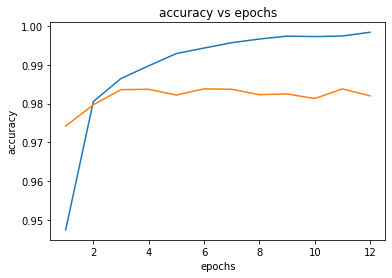

In [ ]:
plot_curves(history.history.get('accuracy'),history.history.get('val_accuracy'), y_label='accuracy')

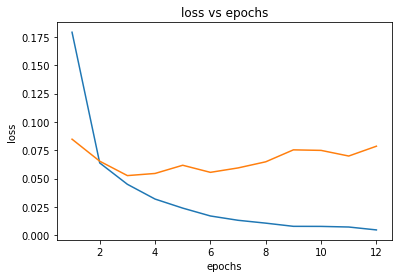

In [ ]:
plot_curves(history.history.get('loss'),history.history.get('val_loss'), y_label='loss')

### Results: it is overfitting 